In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv("Life Expectancy Data.csv")

In [ ]:
print("Информация о данных:")
print(df.info())

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12 

In [1]:
df_numeric = df.select_dtypes(include=[np.number])

print("\nОсновные статистики:")
print(df.describe(include='all'))

NameError: name 'df' is not defined

In [ ]:
missing_values = df.isnull().sum()
print("\nПропуски в данных:")
print(missing_values)


Пропуски в данных:
Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


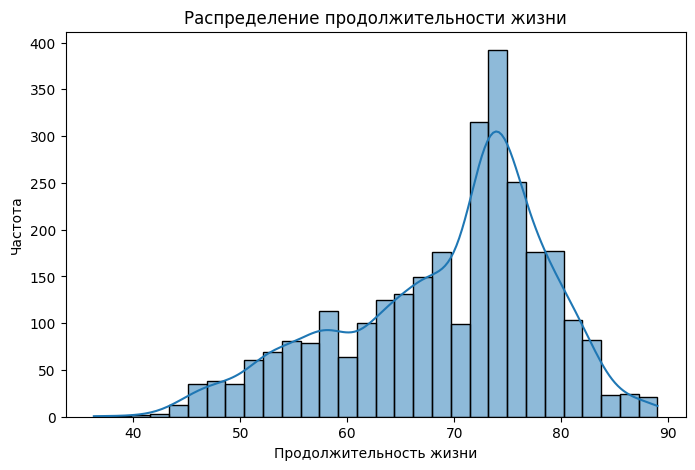

In [ ]:
df_numeric = df_numeric.fillna(df_numeric.median())

plt.figure(figsize=(8, 5))
sns.histplot(df_numeric["Life expectancy "], bins=30, kde=True)
plt.title("Распределение продолжительности жизни")
plt.xlabel("Продолжительность жизни")
plt.ylabel("Частота")
plt.show()

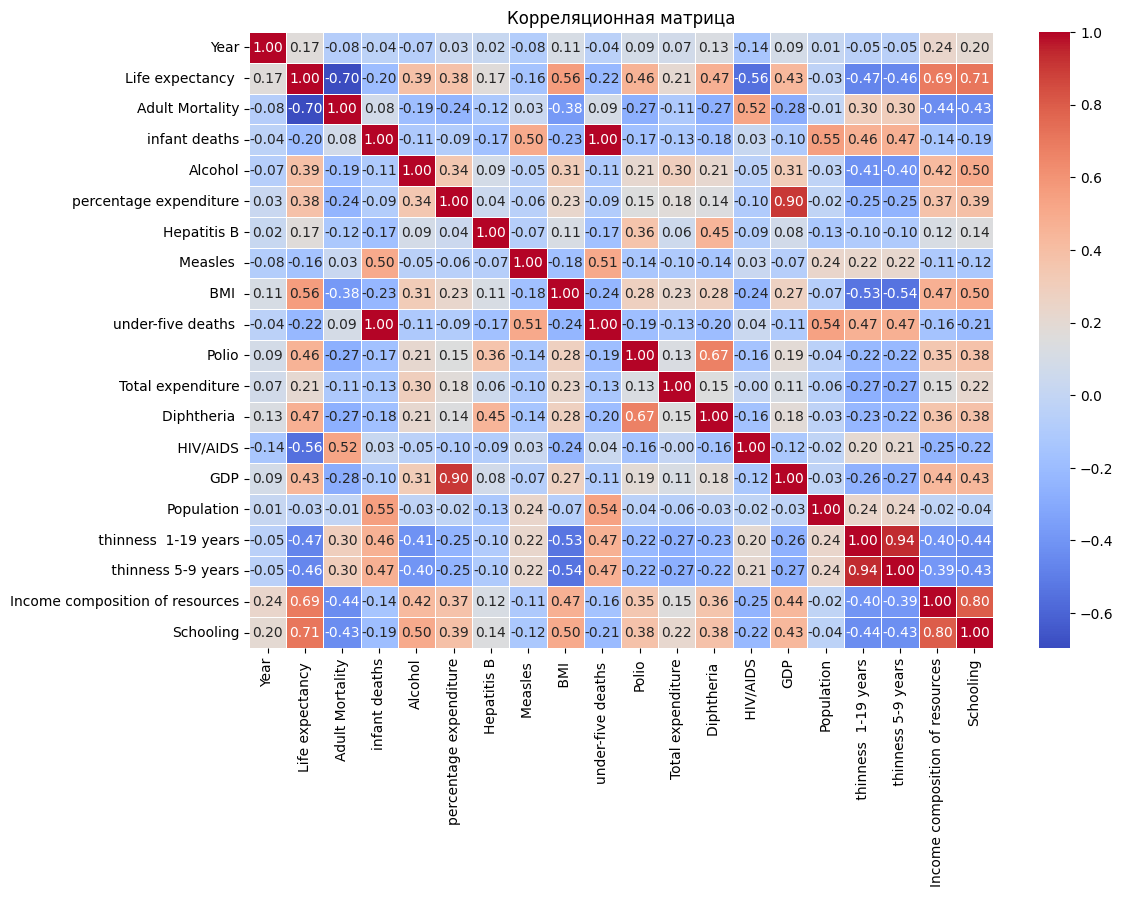

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Корреляционная матрица")
plt.show()

In [ ]:
X = df_numeric.drop(columns=["Life expectancy "])
y = df_numeric["Life expectancy "]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")

MSE: 15.40
R²: 0.82


In [ ]:
feature_importance = pd.DataFrame({
    'Признак': X.columns,
    'Коэффициент': model.coef_
}).sort_values(by='Коэффициент', key=abs, ascending=False)

print("\nВажность признаков:")
print(feature_importance)


Важность признаков:
                            Признак  Коэффициент
8                under-five deaths    -10.968575
2                     infant deaths    10.803950
1                   Adult Mortality    -2.654056
12                         HIV/AIDS    -2.435834
18                        Schooling     2.128659
17  Income composition of resources     1.303340
11                      Diphtheria      0.975301
7                              BMI      0.797994
9                             Polio     0.652977
13                              GDP     0.589910
3                           Alcohol     0.450216
15             thinness  1-19 years    -0.434922
5                       Hepatitis B    -0.427410
6                          Measles     -0.279833
4            percentage expenditure     0.159614
10                Total expenditure     0.153817
14                       Population    -0.062036
16               thinness 5-9 years     0.040245
0                              Year    -0.034440

<ipython-input-11-0f014fe0b343>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance.values, y=feature_importance.index, palette="viridis")


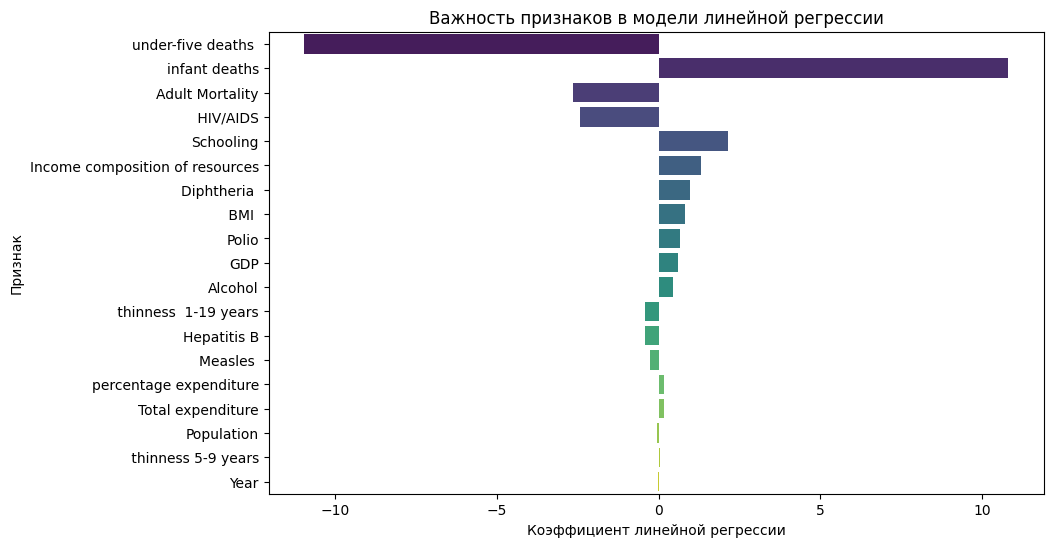

In [ ]:
feature_importance = pd.Series(model.coef_, index=X.columns).sort_values(key=abs, ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.values, y=feature_importance.index, palette="viridis")
plt.title("Важность признаков в модели линейной регрессии")
plt.xlabel("Коэффициент линейной регрессии")
plt.ylabel("Признак")
plt.show()